# Redes Perceptron

* 1958 - Rosenblatt
* Alimentação adiante
* Neurônio artificial

<img src="images/perceptron.png">

<img src="images/activation.png">

O Perceptron é um dos modelos mais simples de redes neurais artificiais, introduzido por Frank Rosenblatt em 1958. Ele é uma unidade de processamento que faz a tomada de decisões binárias, ou seja, ele classifica os dados em uma de duas categorias possíveis. 

### Estrutura do Perceptron

Um Perceptron básico consiste nos seguintes componentes:

1. **Entradas (input)**: São os dados de entrada que podem ser características de um conjunto de dados. Cada entrada é associada a um peso.
   
2. **Pesos (weights)**: Cada entrada é multiplicada por um peso. Os pesos são ajustáveis e representam a importância de cada entrada na tomada de decisão.

3. **Somatório (weighted sum)**: É calculada a soma ponderada das entradas, ou seja, cada entrada multiplicada pelo seu respectivo peso é somada. 

4. **Função de ativação**: O resultado do somatório é passado por uma função de ativação que decide se o neurônio deve ser ativado (1) ou não (0). No perceptron clássico, usa-se a função degrau (step function), que retorna 1 se a soma ponderada é maior ou igual a um limiar (threshold) e 0 caso contrário.

### Funcionamento do Perceptron

1. **Inicialização dos pesos**: Os pesos são inicialmente definidos de maneira aleatória.
   
2. **Cálculo da saída***: Para cada amostra do conjunto de dados, calcula-se a saída do perceptron aplicando a função de ativação à soma ponderada das entradas.

3. ***Atualização dos pesos**: Os pesos são ajustados com base na diferença entre a saída desejada (rótulo real) e a saída obtida pelo perceptron. A atualização dos pesos segue a regra de aprendizado:


w_i(t+1) = w_i(t) + n * (d-y) * Xi

onde:
- w_i(t)  é o peso no instante  t 
-  n  é a taxa de aprendizado
-  d  é a saída desejada
-  y  é a saída obtida
-  x_i  é a entrada  i 

### Limitações

- **Linearidade**: O Perceptron só pode resolver problemas linearmente separáveis. Não consegue lidar com problemas como o XOR.

- **Função de ativação**: O uso da função degrau limita a capacidade de modelar complexidades. Redes neurais mais complexas usam funções de ativação não-lineares como ReLU ou sigmoid.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

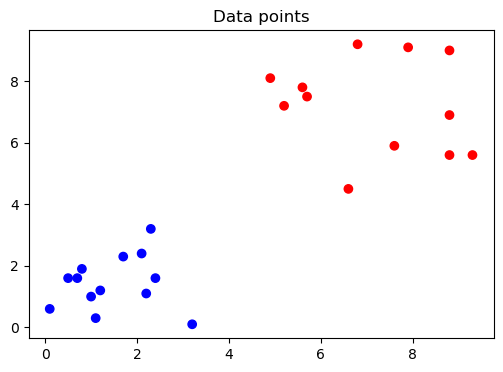

In [ ]:
# Dataset de entrada com 25 pontos bidimensionais (x, y)
x = np.array([[1.0, 1.0], [2.1, 2.4], [1.1, 0.3], [2.3, 3.2], [0.1, 0.6],
              [0.5, 1.6], [1.7, 2.3], [0.7, 1.6], [3.2, 0.1], [2.2, 1.1],
              [0.8, 1.9], [2.4, 1.6], [1.2, 1.2], [5.2, 7.2], [6.6, 4.5],
              [4.9, 8.1], [7.6, 5.9], [8.8, 9.0], [5.6, 7.8], [8.8, 5.6],
              [7.9, 9.1], [6.8, 9.2], [8.8, 6.9], [9.3, 5.6], [5.7, 7.5]
             ])

# Labels (-1 ou 1) correspondentes a cada ponto do dataset
d = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

plt.figure(figsize=(6,4))
plt.title("Data points")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr') #  -1: azul e 1: vermelho
plt.show()

In [ ]:
class Perceptron:
    # Construtor, define taxa de aprendizado(lr) e número máximo de épocas
    def __init__(self, lr, n_epochs):
        self.lr = lr
        self.n_epochs = n_epochs
    
    # Função de ativação que retorna 1 se value > 0, -1 se value < 0, 0 se value == 0
    def activation(self, value):
        return (1 if value > 0 else -1 if value < 0 else 0)

    # Multiplicação matricial entre as entradas e os pesos somado ao bias proporcional
    def predict(self, x): 
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
    
    # Calcula a diferença entre o valor real(target) e o valor predito(predicted)
    def evaluate(self, target, predicted):
        return (target - predicted)
    
    # Função de treinamento do perceptron
    def train(self, x, d):
        # Definir aleatoriamente os pesos, o bias e o peso do bias
        self.weights = np.random.random(x.shape[1])
        self.bias = np.random.random()
        self.w_bias = np.random.random()
        
        epoch = 0
        is_error = True # Se ainda há erros
        self.total_error = [] # Lista para armazenar o erro médio por época
        
         # Enquanto houver erro e máximo de épocas não for atingido continua o processo
        while is_error and epoch < self.n_epochs:
            
            is_error  = False # Assume que não há erro no início
            epoch_errors = 0  # Soma dos erros na época atual
            
            # Para cada amostra e rótulo
            for xi, target in zip(x, d):
                predicted = self.predict(xi) # Previsão
                predicted = self.activation(predicted) # Função de ativação
                current_error = self.evaluate(target, predicted) # Calcula erro atual
                epoch_errors += current_error # Acumula os erros da época
                
                # Se houve erro, atualizar os pesos 
                if predicted != target:
                    self.weights += self.lr * current_error * xi
                    self.w_bias += self.lr * current_error * self.bias
                    is_error = True # Ainda tem erro

            # Armazena o erro médio da época
            self.total_error.append(epoch_errors/len(x))
            epoch += 1
            
    # Função de teste para realizar previsões em novos dados
    def test(self, x):
        results = []  # Armazena os resultados
        for xi in x:
            predict = self.predict(xi) # Faz previsão
            predict = self.activation(predict) # Função de ativação
            results.append(predict) # Armazena o resultado
            
        return results

In [ ]:
# Cria uma instância do Perceptron com taxa de aprendizado 0.1 e 100 épocas
p = Perceptron(lr = 0.1, n_epochs = 100)

# Treina o perceptron com os dados de entrada (x) e os rótulos (d)
p.train(x = x, d = d)

In [9]:
# Define novos pontos de teste
x_teste = np.array([[1, 4], [3, 1], [3, 2], [5, 5], [6, 7], [4, 8]])

# Submete os pontos de teste ao perceptron treinado
teste_resultado = p.test(x_teste)

# Imprime os resultados da classificação dos pontos de teste
teste_resultado

[-1, -1, -1, 1, 1, 1]

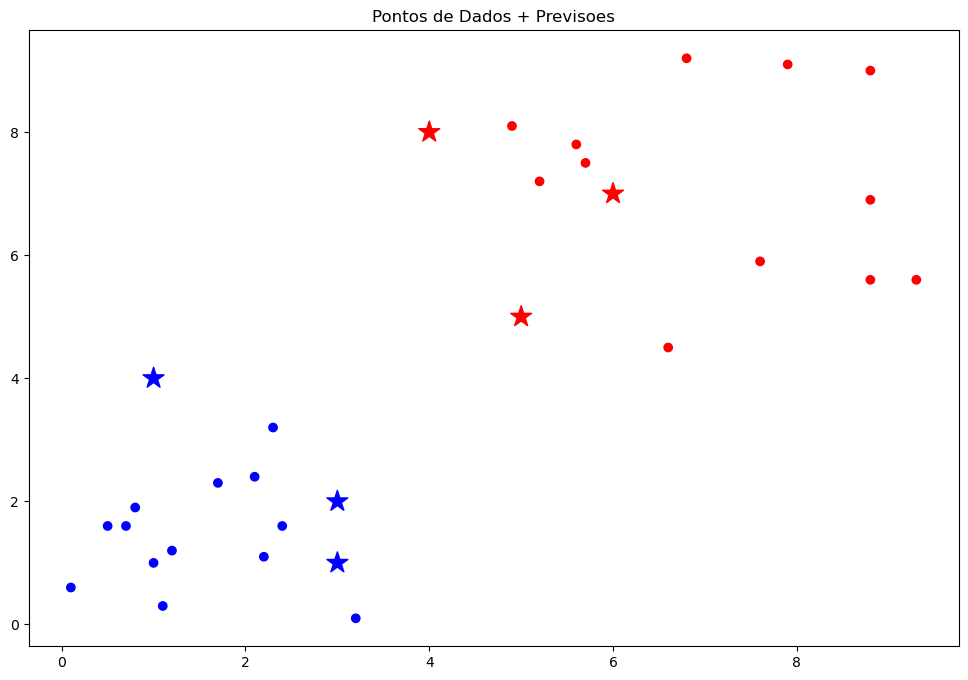

In [16]:
plt.figure(figsize=(12,8))
plt.title("Pontos de Dados + Previsoes")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.scatter(x_teste[:, 0], x_teste[:, 1], c = teste_resultado, cmap = 'bwr', marker = "*", s=250)
plt.show()

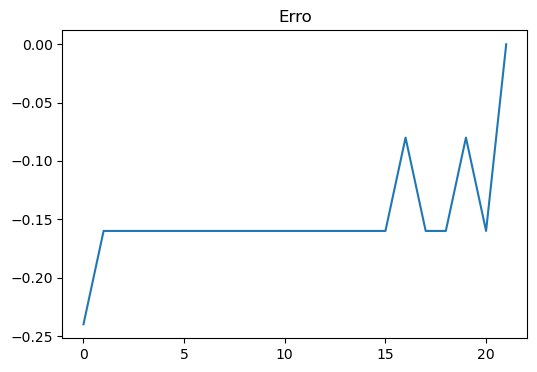

In [12]:
plt.figure(figsize=(6,4))
plt.title("Erro")
plt.plot(p.total_error)
plt.show()

In [15]:
#self.weights = np.array([0.5, 0.7])
#self.bias = -1
#self.w_bias = 0.1
#x = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
#d = np.array([-1,1,1,1])